# Домашнее задание по теме «Случайные марковские процессы» Лебедевой И.С. (DSU-70, TSML-24)


Задани

    1. Скачайте текст произведения «Война и мир»: ссылка на GitHub https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace
    
    2. Очистите его, оставив только русские буквы и символы пробела.
    
    3. Постройте матрицу переходных вероятностей.
    
    4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
    
    5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
    
    6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
    
    7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [179]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [181]:
with open('tom_2.txt', 'r') as f:
    text_1 = f.read().lower()
text_1 = re.sub('[^а-я ]','', text_1)

with open('tom_2.txt', 'r') as f:
    text_2 = f.read().lower()
text_2 = re.sub('[^а-я ]','', text_2)

with open('tom_3.txt', 'r') as f:
    text_3 = f.read().lower()
text_3 = re.sub('[^а-я ]','', text_3)

with open('tom_4.txt', 'r') as f:
    text_4 = f.read().lower()
text_4 = re.sub('[^а-я ]','', text_4)

In [183]:
war_and_peace = text_1 + text_2 + text_3 + text_4
war_and_peace

'лев толстойвойна и миртом   том часть перваяхчасть втораячасть третьячасть четвертаячасть пятаяпримечание издателяпечатные варианты  том лев николаевич толстойвойна и миртом часть перваяв начале  года николай ростов вернулся в отпуск денисов ехал тоже домой в воронеж и ростов уговорил его ехать с собой до москвы и остановиться у них в доме на предпоследней станции встретив товарища денисов выпил с ним три бутылки вина и подъезжая к москве несмотря на ухабы дороги не просыпался лежа на дне перекладных саней подле ростова который по мере приближения к москве приходил все более и более в нетерпениескоро ли скоро ли о эти несносные улицы лавки калачи фонари извозчики думал ростов когда уже они записали свои отпуски на заставе и въехали в москву денисов приехали спит  говорил он всем телом подаваясь вперед как будто он этим положением надеялся ускорить движение саней денисов не откликался вот он уголперекресток где захар извозчик стоит вот он и захар и вс та же лошадь вот и лавочка где пря

In [184]:
RUS = 'абвгдежзийклмнопрстуфхцчшщьыъэюя '
POS = {l: i for i, l in enumerate(RUS)}

In [185]:
probabilities = np.zeros((len(RUS), len(RUS)))

In [189]:
for cp, cn in zip(war_and_peace[:-1], war_and_peace[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [191]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [193]:
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

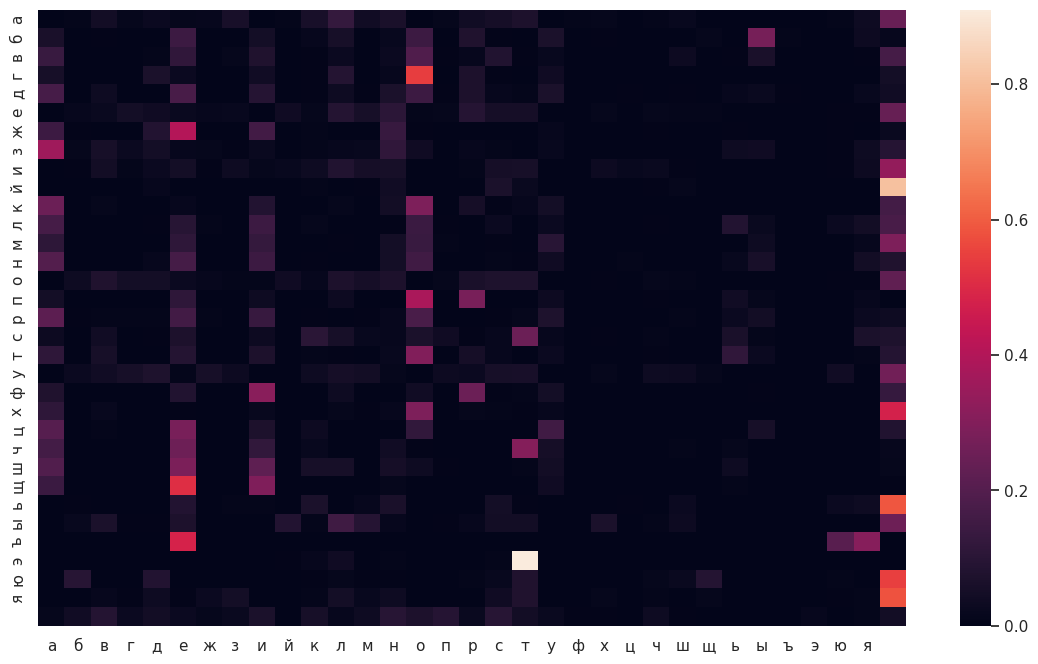

In [195]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

## Посчитаем вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р»

In [197]:
start = POS['п']
end = POS['р']
prior = 1. / (len(RUS))
for c in RUS:
  for e in RUS:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[e], end]
    if proba > 0:
        print(''.join(['п', c, e, 'р']), proba)

паар 6.24130404732153e-05
пабр 0.00011290220193006349
павр 2.5355110828288103e-05
пагр 0.00010571876233341141
падр 0.00010526302650840051
паер 0.00013682187877083927
пажр 4.761865837122063e-07
пазр 2.231728256760745e-05
паир 1.2430582885008927e-05
пайр 9.717510145928455e-07
пакр 7.866107488697834e-05
палр 3.837009312882345e-08
памр 2.880337048314741e-06
панр 1.928751099394515e-06
паор 9.460142273011357e-05
папр 0.000421638792464075
парр 3.2338628705006115e-07
паср 8.984904964006288e-06
патр 7.696442608831578e-05
паур 3.909362256476382e-05
пафр 0.000375989478425271
пахр 1.7634985440022525e-05
пачр 2.265368699618115e-06
пашр 1.3660957713333326e-07
пащр 1.2883420887407579e-06
паьр 9.764007183426854e-08
паыр 2.4073590013649928e-05
паэр 3.126333999948157e-06
паюр 1.1763652242065129e-05
паяр 4.177518679951828e-06
па р 3.5568539336637175e-05
пвар 2.047671931535935e-08
пвбр 3.7041404832698e-08
пввр 8.318605914792684e-09
пвгр 3.4684633311486686e-08
пвдр 3.4535113683858433e-08
пвер 4.48890678382

## 5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [199]:
RUS2 = 'абвгдежзийклмнопрстуфхцчшщьыъэюя'
POS2 = {l: i for i, l in enumerate(RUS2)}

In [206]:
s = []
s.append('б')
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бетидеро


##  Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

In [216]:
!pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [243]:
from hmmlearn.hmm import GaussianHMM
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'hmmlearn'

In [236]:
from sklearn.utils import check_random_state

from hmmlearn import vhmm

ModuleNotFoundError: No module named 'hmmlearn'

In [238]:
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

ModuleNotFoundError: No module named 'hmmlearn'

In [224]:
from sklearn.hmm import GaussianHMM

ModuleNotFoundError: No module named 'sklearn.hmm'

In [220]:
series = pd.read_csv('international-airline-passengers.csv')['Count']
values = series.values.reshape(-1,1)

   # "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
   # "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"]

In [222]:
series

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Count, Length: 144, dtype: int64

In [ ]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

## 7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [241]:
len(values)

144

In [ ]:
X = values[:115]
y = values[115:]

In [245]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(X_train)
    print (n, model.score(X_train))

NameError: name 'GaussianHMM' is not defined

In [247]:
model = GaussianHMM(n_components=29,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(X_train)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

NameError: name 'GaussianHMM' is not defined

NameError: name 'means' is not defined

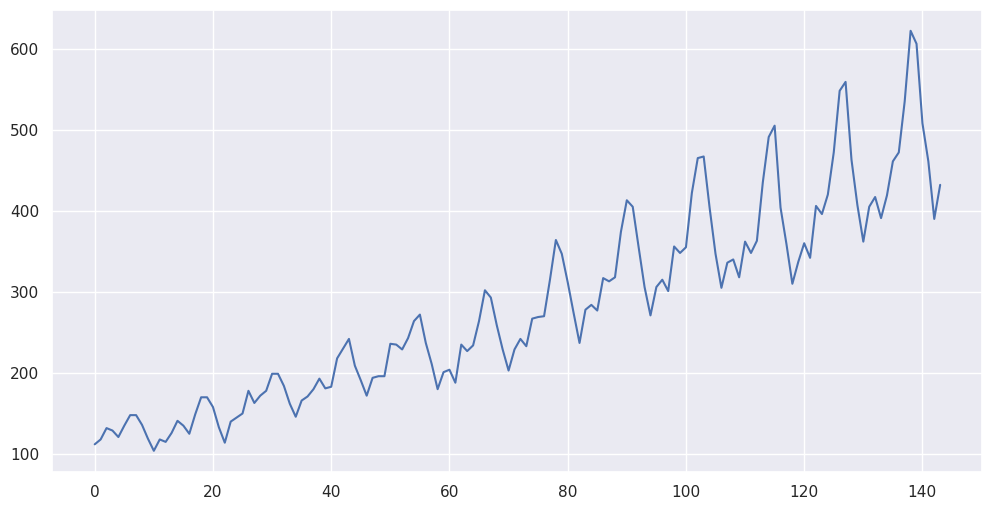

In [249]:
plt.figure(figsize=(12, 6))
plt.plot(values,label='values')
plt.plot(means, linewidth=4, alpha=0.45,linestyle='-.', label='means')
plt.legend()
plt.show()